In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
#import the libraries
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder

import lime 
from lime import lime_tabular
import shap

In [2]:
#imbalanced data
train = pd.read_csv('train.csv').drop('datasetId',axis=1)
test = pd.read_csv('test.csv').drop('datasetId',axis=1)

swell_data = pd.concat([train,test], axis=0) 
swell_data = swell_data.reset_index(drop=True) 

In [3]:
#imbalanced data
# Select the categorical column to encode
cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data[cat_col] = label_encoder.fit_transform(swell_data[cat_col])

In [4]:
#imbalanced data
# Load the dataset and separate the input features and target variable
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

In [5]:
#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

In [ ]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 6)]
# evaluate a decision tree for each depth

for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.savefig('x1.png', dpi=300)
plt.show()

In [ ]:
#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

# Fit and apply the transform
X_resampled_s, y_resampled_s = smote.fit_resample(X, y)
X_resampled_s.shape, y_resampled_s.shape

#SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_s, y_resampled_s, test_size=0.2, stratify=y_resampled_s, random_state=42, shuffle=True)

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 6)]
# evaluate a decision tree for each depth

for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.savefig('x2.png', dpi=300)
plt.show()

In [ ]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

#ADASYN
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_a, y_resampled_a, test_size=0.2, stratify=y_resampled_a, random_state=42, shuffle=True)

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 6)]
# evaluate a decision tree for each depth

for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.savefig('x3.png', dpi=300)
plt.show()

In [ ]:
#Learning curve
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import learning_curve, ShuffleSplit

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_lr, fit_times_lr, score_times_lr = learning_curve(
    lr, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    rf, **common_params
)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_lr, fit_times_svm],
        [score_times_lr, score_times_svm],
        [lr, svc],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

In [ ]:
#Validation Curve
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import validation_curve
import plotly.graph_objects as go 

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

In [ ]:
param_range = np.arange(3, 30, 3)
plot_validation_curves(clf, X_train, Y_train, "max_depth", param_range, 5)

In [6]:
#imbalanced
train = pd.read_csv('train.csv').drop('datasetId',axis=1)
test = pd.read_csv('test.csv').drop('datasetId',axis=1)

# Concatenating the train and test datasets
swell = pd.concat([train,test], axis=0)
swell = swell.reset_index(drop=True)

cols = ['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci', 'condition']

swell = swell[cols]

X = swell.drop('condition',axis=1).to_numpy()
y = swell['condition']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
print(X_test[1], y_test[1])
print(X_test[2], y_test[2])
print(X_test[3], y_test[3])

print(X_test[5410], y_test[5410])
print(X_test[31000], y_test[31000])
print(X_test[41002], y_test[41002])

print(X_test[31001], y_test[31001]) 
print(X_test[31002], y_test[31002]) 

[9.22694325e+02 6.54123727e+01 0.00000000e+00 4.95468162e-03
 2.36567408e+00 1.96215133e+01 4.38218843e+00 1.12576699e+00] 1
[7.61991935e+02 7.78574835e+01 1.33333333e+00 1.63883453e-02
 1.49209406e+00 2.28197952e+01 2.87956004e+01 1.12896668e+00] 1
[7.84977070e+02 7.66449422e+01 0.00000000e+00 6.97483477e-03
 1.67006655e+00 3.13212710e+01 2.73286617e+01 1.21050512e+00] 1
[7.50739005e+02 7.85978513e+01 3.53333333e+00 1.65115414e-02
 1.73153938e+00 1.42135616e+01 1.26866280e+02 1.15877060e+00] 0
[8.32299845e+02 7.37550315e+01 1.46666667e+00 1.22746781e-02
 1.95824217e+00 5.15623458e+01 4.37281384e+01 1.21083969e+00] 0
[7.90702870e+02 7.65570087e+01 0.00000000e+00 7.73431109e-03
 1.92587802e+00 3.54083695e+01 2.37757383e+01 1.20315090e+00] 0
[8.66545185e+02 7.11676063e+01 3.33333333e-01 1.13373673e-02
 1.55050211e+00 3.41147066e+01 4.28617305e+01 1.30456972e+00] 2
[8.43586080e+02 7.14252886e+01 1.33333333e-01 9.94938891e-03
 1.66318416e+00 2.64214088e+01 2.96863100e+01 1.30221038e+00] 2


In [8]:
!pip install shap

In [9]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [11]:
col = ['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci']

shap.initjs()

i=1
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X[i], feature_names = col)

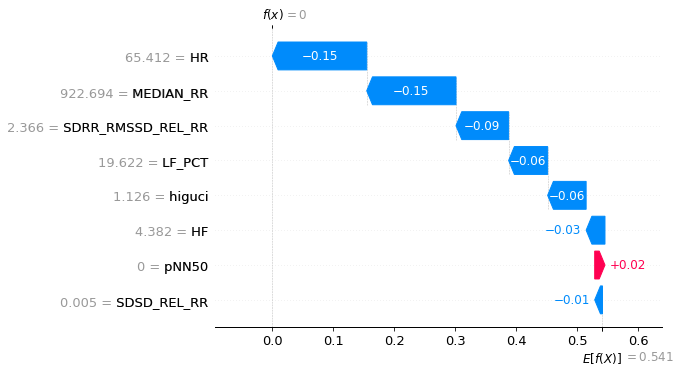

In [15]:
shap.initjs()

row = 1
shap.waterfall_plot(shap.Explanation(values=shap_values[1][row], 
                                              base_values=explainer.expected_value[1], data=X_test[row],  
                                         feature_names=col))

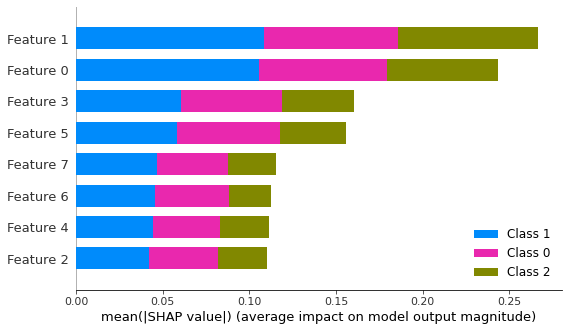

In [16]:
shap.summary_plot(shap_values, X)

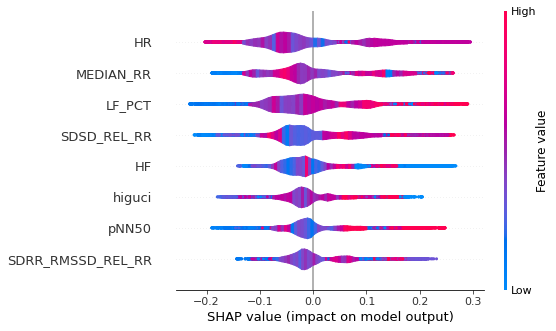

In [18]:
shap.summary_plot(shap_values[0], X, plot_type = 'violin', feature_names = col)

In [19]:
shap.initjs()

i=5410
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X[i], feature_names = col)

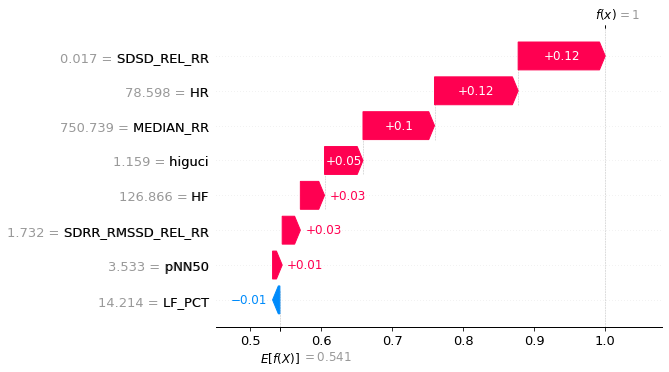

In [20]:
shap.initjs()

row = 5410
shap.waterfall_plot(shap.Explanation(values=shap_values[1][row], 
                                              base_values=explainer.expected_value[1], data=X_test[row],  
                                         feature_names=col))

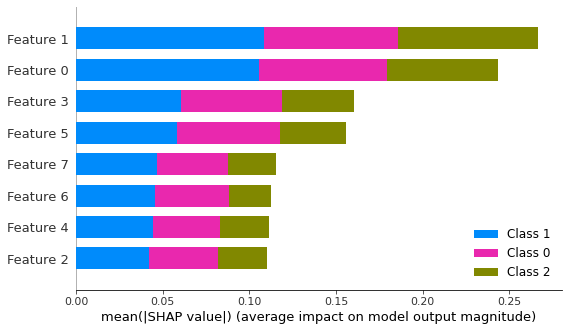

In [21]:
shap.summary_plot(shap_values, X)

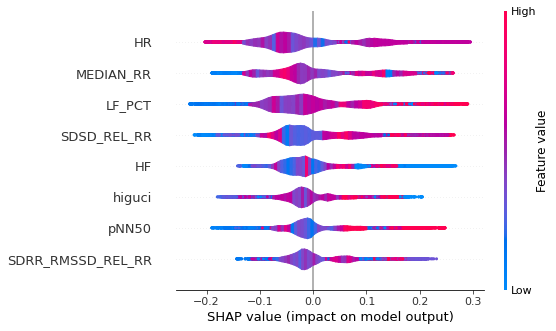

In [22]:
shap.summary_plot(shap_values[0], X, plot_type = 'violin', feature_names = col)

In [23]:
shap.initjs()

i=31001
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X[i], feature_names = col)

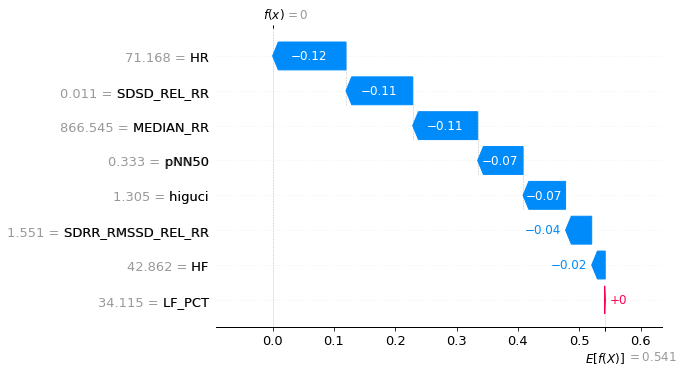

In [24]:
shap.initjs()

row = 31001
shap.waterfall_plot(shap.Explanation(values=shap_values[1][row], 
                                              base_values=explainer.expected_value[1], data=X_test[row],  
                                         feature_names=col))

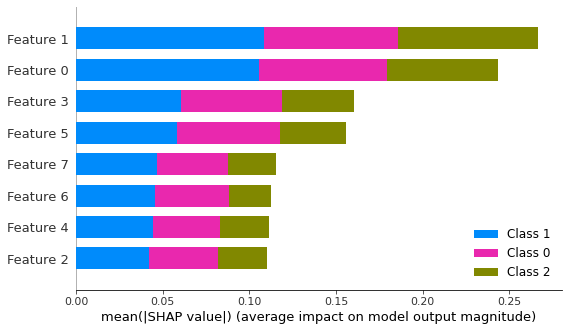

In [25]:
shap.summary_plot(shap_values, X)

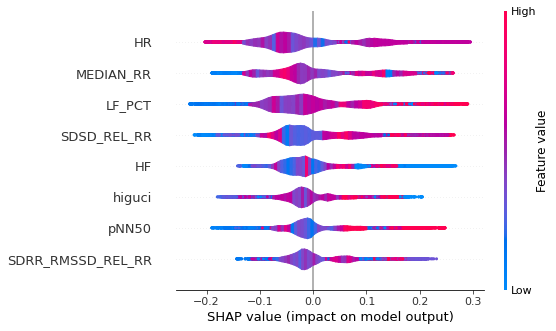

In [26]:
shap.summary_plot(shap_values[0], X, plot_type = 'violin', feature_names = col)

In [ ]:
test_1 = X_test[5410] #0

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci'],
    class_names=[0, 1, 2],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

lime_exp.as_list()

In [ ]:
lime_exp.as_pyplot_figure()

In [ ]:
test_1 = X_test[1] #1

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci'],
    class_names=[0, 1, 2],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

lime_exp.as_list()

In [ ]:
lime_exp.as_pyplot_figure()

In [ ]:
test_1 = X_test[31001] #2

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['MEDIAN_RR', 'HR', 'pNN50', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'LF_PCT', 'HF', 'higuci'],
    class_names=[0, 1, 2],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

lime_exp.as_list()

In [ ]:
lime_exp.as_pyplot_figure()

In [ ]:
#imbalanced
train = pd.read_csv('train.csv').drop('datasetId',axis=1)
test = pd.read_csv('test.csv').drop('datasetId',axis=1)

# Concatenating the train and test datasets
swell = pd.concat([train,test], axis=0)
swell = swell.reset_index(drop=True)

cols = ['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF', 'condition']

swell = swell[cols]

# Feature selection using ANOVA F-value
X = swell.drop('condition',axis=1).to_numpy()
y = swell['condition']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:
print(X_test[1], y_test[1])
print(X_test[2], y_test[2])
print(X_test[3], y_test[3])

print(X_test[5410], y_test[5410])
print(X_test[31000], y_test[31000])
print(X_test[41002], y_test[41002])

print(X_test[31001], y_test[31001]) 
print(X_test[31002], y_test[31002]) 

In [ ]:
test_1 = X_test[5410] #0

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF'],
    class_names=[0, 1, 2],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

lime_exp.as_list()

In [ ]:
lime_exp.as_pyplot_figure()

In [ ]:
test_1 = X_test[1] #1

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF'],
    class_names=[0, 1, 2],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

lime_exp.as_list()

In [ ]:
lime_exp.as_pyplot_figure()

In [ ]:
test_1 = X_test[31001] #2

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['MEAN_RR', 'pNN25', 'pNN50', 'SD2', 'MEDIAN_REL_RR', 'RMSSD_REL_RR', 'SKEW_REL_RR', 'SDSD_REL_RR', 'VLF_PCT', 'LF_HF'],
    class_names=[0, 1, 2],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)

lime_exp.show_in_notebook(show_table=True)

lime_exp.as_list()

In [ ]:
lime_exp.as_pyplot_figure()